In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
df=pd.read_csv('C:\Sales prediction details\Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


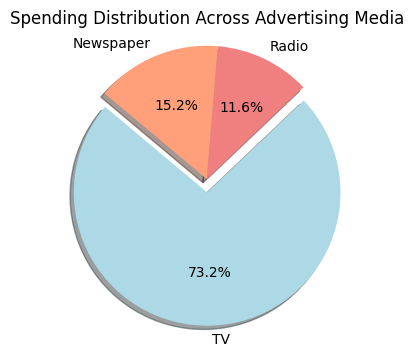

In [6]:
tv_spending=df['TV'].sum()
radio_spending=df['Radio'].sum()
newspaper_spending=df['Newspaper'].sum()
labels=['TV','Radio','Newspaper']
sizes=[tv_spending, radio_spending, newspaper_spending]
colors=['lightblue','lightcoral','lightsalmon']
explode=(0.1,0,0)
plt.figure(figsize=(4,4))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.title('Spending Distribution Across Advertising Media')
plt.show()

In [7]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_class=np.where(y_pred>np.mean(y_pred),1,0)
y_test_class=np.where(y_test>np.mean(y_test),1,0)
accuracy=accuracy_score(y_test_class,y_pred_class)
recall=recall_score(y_test_class,y_pred_class)
precision=precision_score(y_test_class,y_pred_class)
print(f'Accuracy:{accuracy*100:.2f}')
print(f'Recall:{recall*100:.2f}')
print(f'Precision:{precision*100:.2f}')
coefficients=model.coef_
platform_names=['TV','Radio','Newspaper']
best_platform_index=np.argmax(coefficients)
best_platform=platform_names[best_platform_index]
print(f"\nThe best performing platform based on the data set is:{best_platform}")

Accuracy:96.00
Recall:94.44
Precision:98.08

The best performing platform based on the data set is:Radio
